In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmplot
from IPython.display import display
from IPython.display import IFrame
from scipy.stats import lognorm
from scipy.stats import norm
import scipy.stats as stats

En la celda siguiente haremos todo lo relacionado a extracción de datos



In [3]:
# Ruta del archivo CSV


# Cargar el archivo CSV en un dataframe
dataframe = pd.read_csv("datos_mibici_2023_mayo.csv")

dataframe['Inicio_del_viaje'] = pd.to_datetime(dataframe['Inicio_del_viaje'])
dataframe['Fin_del_viaje'] = pd.to_datetime(dataframe['Fin_del_viaje'])

# Calcular la duración del viaje en minutos y guardarla en la columna 'Duracion_del_viaje'
dataframe['Duracion_del_viaje'] = (dataframe['Fin_del_viaje'] - dataframe['Inicio_del_viaje']).dt.total_seconds() / 60

mapeo_genero = {'M': 0, 'F': 1} #HOMBRES (M) --> 0 Y MUJERES(F)-->1
# Aplicar el mapeo al dataframe
dataframe['Genero'] = dataframe['Genero'].map(mapeo_genero)
# Obtener el año actual
anio_actual = 2023
# Calcular la edad restando el año de nacimiento del año actual
dataframe['Edad'] = anio_actual - dataframe['Ano_de_nacimiento']
# Verificar la carga exitosa imprimiendo las primeras filas del dataframe
dataframe.head()

,Viaje_Id,Usuario_Id,Genero,Ano_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Duracion_del_viaje,Edad
0,28467098,70123,0.0,1967.0,2023-05-01 00:00:03,2023-05-01 00:22:19,64,141,22.266667,56.0
1,28467099,2237235,0.0,1980.0,2023-05-01 00:00:23,2023-05-01 00:04:26,36,172,4.050000,43.0
2,28467100,2051727,1.0,2002.0,2023-05-01 00:01:05,2023-05-01 00:10:21,96,296,9.266667,21.0
3,28467101,2246225,0.0,1969.0,2023-05-01 00:01:07,2023-05-01 00:04:14,33,255,3.116667,54.0
4,28467102,324247,0.0,1975.0,2023-05-01 00:01:26,2023-05-01 00:13:18,226,231,11.866667,48.0


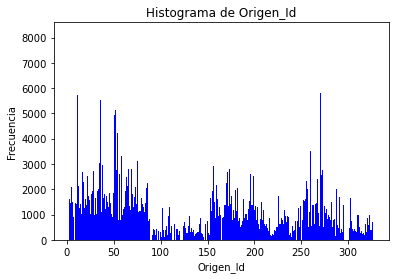

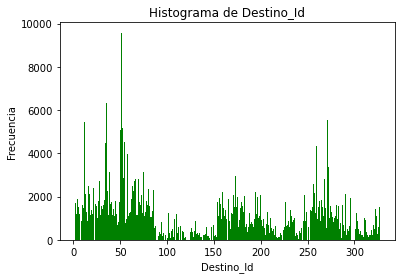

In [4]:
num_bins = max(dataframe['Origen_Id'])
# Crear histograma para la variable "Origen_Id"
plt.hist(dataframe['Origen_Id'], bins=num_bins, color="blue")  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Origen_Id')
plt.ylabel('Frecuencia')
plt.title('Histograma de Origen_Id')
plt.show()


# Crear histograma para la variable "Destino_Id"
plt.hist(dataframe['Destino_Id'], bins=num_bins, color="green")  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Destino_Id')
plt.ylabel('Frecuencia')
plt.title('Histograma de Destino_Id')
plt.show()



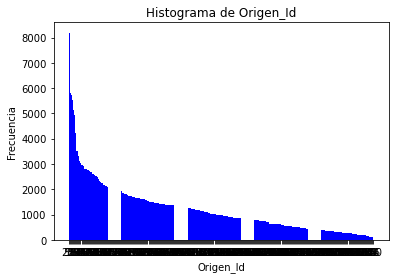

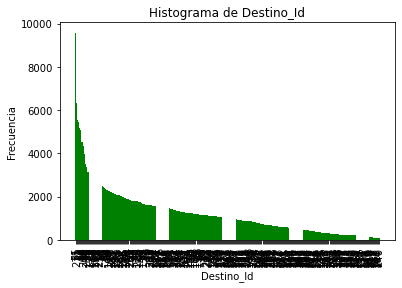

In [5]:
import matplotlib.pyplot as plt

# Obtener las frecuencias de la columna "Origen_Id" y ordenarlas de manera descendente
origen_counts = dataframe['Origen_Id'].value_counts().sort_values(ascending=False)

# Obtener los valores y las frecuencias ordenadas
origen_values = origen_counts.index
origen_frequencies = origen_counts.values

# Crear histograma para la variable "Origen_Id" con las barras ordenadas
plt.bar(range(len(origen_values)), origen_frequencies, color="blue")
plt.xlabel('Origen_Id')
plt.ylabel('Frecuencia')
plt.title('Histograma de Origen_Id')
plt.xticks(range(len(origen_values)), origen_values)  # Etiquetas en el eje x correspondientes a los valores
plt.show()

# Obtener las frecuencias de la columna "Destino_Id" y ordenarlas de manera descendente
destino_counts = dataframe['Destino_Id'].value_counts().sort_values(ascending=False)

# Obtener los valores y las frecuencias ordenadas
destino_values = destino_counts.index
destino_frequencies = destino_counts.values

# Crear histograma para la variable "Destino_Id" con las barras ordenadas
plt.bar(range(len(destino_values)), destino_frequencies, color="green")
plt.xlabel('Destino_Id')
plt.ylabel('Frecuencia')
plt.title('Histograma de Destino_Id')
plt.xticks(range(len(destino_values)), destino_values)
# Etiquetas en el eje x correspondientes a los valores
plt.xticks(rotation=90)
plt.show()

In [6]:
# Obtener las frecuencias de los ID en la columna "Origen_Id"
origen_freq = dataframe['Origen_Id'].value_counts()

# Seleccionar los 20 primeros ID con mayor frecuencia
top_20_ids = origen_freq.head(10)

# Imprimir los 20 ID con mayor frecuencia
print(top_20_ids)

51     8186
271    5795
11     5747
35     5536
52     5116
50     4935
54     4212
260    3511
194    3503
58     3307
Name: Origen_Id, dtype: int64


In [7]:
# Obtener las frecuencias de los ID en la columna "Origen_Id"
fin_freq = dataframe['Destino_Id'].value_counts()

# Seleccionar los 20 primeros ID con mayor frecuencia
top_20_ids = fin_freq.head(10)

# Imprimir los 20 ID con mayor frecuencia
print(top_20_ids)

51     9578
35     6345
271    5548
11     5452
52     5171
50     5080
54     4540
34     4504
260    4326
58     3986
Name: Destino_Id, dtype: int64


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir función para el algoritmo EM
def em_algorithm(data, num_clusters, num_iterations):
    # Inicializar parámetros
    weights = np.ones(num_clusters) / num_clusters
    means = np.linspace(min(data), max(data), num_clusters)
    variances = np.ones(num_clusters)

    for _ in range(num_iterations):
        # PASO E
        likelihoods = np.zeros((len(data), num_clusters))
        for i in range(num_clusters):
            likelihoods[:, i] = weights[i] * norm.pdf(data, means[i], np.sqrt(variances[i]))

        sum_likelihoods = np.sum(likelihoods, axis=1, keepdims=True)
        responsibilities = np.divide(likelihoods, sum_likelihoods, out=np.zeros_like(likelihoods), where=sum_likelihoods!=0)

        # PASO M
        weights = np.mean(responsibilities, axis=0)
        means = np.sum(responsibilities * data[:, np.newaxis], axis=0) / np.sum(responsibilities, axis=0)
        variances = np.sum(responsibilities * (data[:, np.newaxis] - means)**2, axis=0) / np.sum(responsibilities, axis=0)
        variances = np.clip(variances, a_min=1e-10, a_max=None)  # Asegurar que las varianzas sean no nulas

    return weights, means, variances




In [9]:
def in_interval(x,a,b):
    if  (x>= a and x<=b):
        return True
    else:
        return False


def asignar_location(valor):
    if (valor>= 2 and valor<=88) or (valor>= 125 and valor<=141) or (valor>= 154 and valor<=225) or (valor>= 241 and valor<=250) or (valor>= 253 and valor<=256) or (valor>= 259 and valor<=266) or (valor>= 268 and valor<=269)or(valor>= 271 and valor<=285) or (valor>= 303 and valor<=304) or (valor>= 306 and valor<=316) or (valor>= 319 and valor<=321) or (valor>= 323 and valor<=324) or (valor>= 326 and valor<=327):
        return 0 #POLIGONO CENTRAL
    elif (valor>= 91 and valor<=120) or (valor>= 286 and valor<=296):
        return 1 #ZAPOAN CENTRO
    elif in_interval(valor,142,153) or in_interval(valor,226,240) or (valor==267)or (valor==270) or (valor==302) or (valor==305) or in_interval(valor,317,318) or (valor==322) or (valor==325):
        return 2 #TLQ-CORREDORATLAS

# Aplicar la función a la columna "Destino_Id" y asignar los valores resultantes a la columna "Zona"
dataframe['Zona'] = dataframe['Destino_Id'].apply(asignar_location)     
dataframe.head()



,Viaje_Id,Usuario_Id,Genero,Ano_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Duracion_del_viaje,Edad,Zona
0,28467098,70123,0.0,1967.0,2023-05-01 00:00:03,2023-05-01 00:22:19,64,141,22.266667,56.0,0.0
1,28467099,2237235,0.0,1980.0,2023-05-01 00:00:23,2023-05-01 00:04:26,36,172,4.050000,43.0,0.0
2,28467100,2051727,1.0,2002.0,2023-05-01 00:01:05,2023-05-01 00:10:21,96,296,9.266667,21.0,1.0
3,28467101,2246225,0.0,1969.0,2023-05-01 00:01:07,2023-05-01 00:04:14,33,255,3.116667,54.0,0.0
4,28467102,324247,0.0,1975.0,2023-05-01 00:01:26,2023-05-01 00:13:18,226,231,11.866667,48.0,2.0


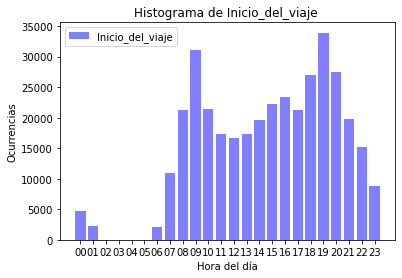

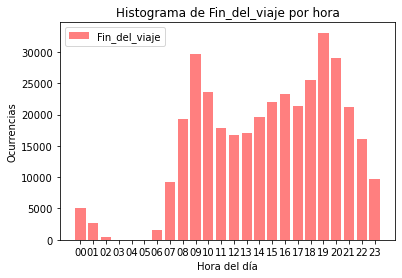

In [10]:

import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Convertir las columnas a formato de fecha y hora
dataframe["Inicio_del_viaje"] = pd.to_datetime(dataframe["Inicio_del_viaje"])
dataframe["Fin_del_viaje"] = pd.to_datetime(dataframe["Fin_del_viaje"])

# Paso 2: Extraer la hora y contar las ocurrencias
inicio_histograma = dataframe["Inicio_del_viaje"].dt.hour.value_counts().sort_index()
fin_histograma = dataframe["Fin_del_viaje"].dt.hour.value_counts().sort_index()

# Paso 3: Crear el histograma
horas = [str(i).zfill(2) for i in range(24)]  # Lista de horas desde "00" hasta "23"
inicio_ocurrencias = [inicio_histograma.get(int(hour), 0) for hour in horas]
fin_ocurrencias = [fin_histograma.get(int(hour), 0) for hour in horas]

color_inicio = "blue"  # Color para las barras de Inicio_de_viaje
color_fin = "red"  # Color para las barras de Fin_de_viaje

plt.bar(horas, inicio_ocurrencias,color=color_inicio ,alpha=0.5, label="Inicio_del_viaje")
plt.xlabel("Hora del día")
plt.ylabel("Ocurrencias")
plt.title("Histograma de Inicio_del_viaje ")
plt.legend()
plt.show()


plt.bar(horas, fin_ocurrencias, alpha=0.5,color=color_fin, label="Fin_del_viaje")
plt.xlabel("Hora del día")
plt.ylabel("Ocurrencias")
plt.title("Histograma de Fin_del_viaje por hora")
plt.legend()
plt.show()

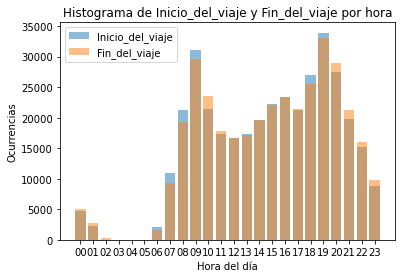

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Convertir las columnas a formato de fecha y hora
dataframe["Inicio_del_viaje"] = pd.to_datetime(dataframe["Inicio_del_viaje"])
dataframe["Fin_del_viaje"] = pd.to_datetime(dataframe["Fin_del_viaje"])

# Paso 2: Extraer la hora y contar las ocurrencias
inicio_histograma = dataframe["Inicio_del_viaje"].dt.hour.value_counts().sort_index()
fin_histograma = dataframe["Fin_del_viaje"].dt.hour.value_counts().sort_index()

# Paso 3: Crear el histograma
horas = [str(i).zfill(2) for i in range(24)]  # Lista de horas desde "00" hasta "23"
inicio_ocurrencias = [inicio_histograma.get(int(hour), 0) for hour in horas]
fin_ocurrencias = [fin_histograma.get(int(hour), 0) for hour in horas]

plt.bar(horas, inicio_ocurrencias, alpha=0.5, label="Inicio_del_viaje")
plt.bar(horas, fin_ocurrencias, alpha=0.5, label="Fin_del_viaje")
plt.xlabel("Hora del día")
plt.ylabel("Ocurrencias")
plt.title("Histograma de Inicio_del_viaje y Fin_del_viaje por hora")
plt.legend()
plt.show()

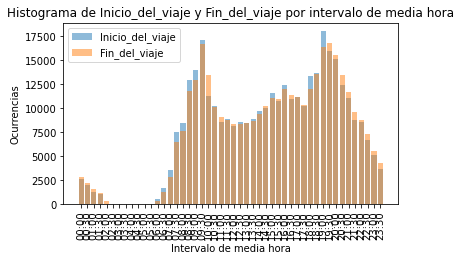

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Convertir las columnas a formato de fecha y hora
dataframe["Inicio_del_viaje"] = pd.to_datetime(dataframe["Inicio_del_viaje"])
dataframe["Fin_del_viaje"] = pd.to_datetime(dataframe["Fin_del_viaje"])

# Paso 2: Extraer la hora y el minuto
dataframe["Inicio_del_viaje_hora"] = dataframe["Inicio_del_viaje"].dt.hour
dataframe["Inicio_del_viaje_minuto"] = dataframe["Inicio_del_viaje"].dt.minute

dataframe["Fin_del_viaje_hora"] = dataframe["Fin_del_viaje"].dt.hour
dataframe["Fin_del_viaje_minuto"] = dataframe["Fin_del_viaje"].dt.minute

# Paso 3: Crear el histograma
intervalos = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]  # Lista de intervalos de media hora
inicio_ocurrencias = []
fin_ocurrencias = []

for intervalo in intervalos:
    hora, minuto = intervalo.split(":")
    hora = int(hora)
    minuto = int(minuto)

    # Filtrar los registros que caen dentro del intervalo de media hora
    filtro_inicio = (dataframe["Inicio_del_viaje_hora"] == hora) & (dataframe["Inicio_del_viaje_minuto"] >= minuto) & (dataframe["Inicio_del_viaje_minuto"] < minuto + 30)
    filtro_fin = (dataframe["Fin_del_viaje_hora"] == hora) & (dataframe["Fin_del_viaje_minuto"] >= minuto) & (dataframe["Fin_del_viaje_minuto"] < minuto + 30)

    # Contar las ocurrencias
    inicio_ocurrencias.append(len(dataframe[filtro_inicio]))
    fin_ocurrencias.append(len(dataframe[filtro_fin]))

plt.bar(intervalos, inicio_ocurrencias, alpha=0.5, label="Inicio_del_viaje")
plt.bar(intervalos, fin_ocurrencias, alpha=0.5, label="Fin_del_viaje")
plt.xlabel("Intervalo de media hora")
plt.ylabel("Ocurrencias")
plt.title("Histograma de Inicio_del_viaje y Fin_del_viaje por intervalo de media hora")
plt.legend()
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_14560\1565057738.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  means = np.sum(responsibilities * data[:, np.newaxis], axis=0) / np.sum(responsibilities, axis=0)
C:\Users\dell\AppData\Local\Temp\ipykernel_14560\1565057738.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  variances = np.sum(responsibilities * (data[:, np.newaxis] - means)**2, axis=0) / np.sum(responsibilities, axis=0)


[0.01917543 0.30431078 0.67651379] [ 0.7816992   9.87078923 17.98357836] [0.30884413 2.49216706 9.43841156]
[0.0221777  0.31149658 0.66632572] [ 0.85635242 10.09664993 18.19525681] [0.37444504 2.66427758 9.08230788]


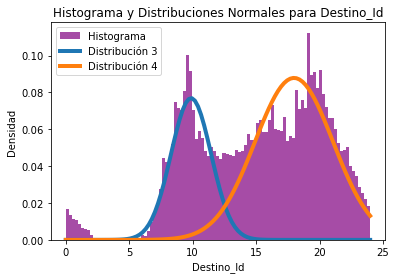

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Convertir las columnas a formato de fecha y hora
dataframe["Inicio_del_viaje"] = pd.to_datetime(dataframe["Inicio_del_viaje"])
dataframe["Fin_del_viaje"] = pd.to_datetime(dataframe["Fin_del_viaje"])

# Paso 2: Extraer la hora y el minuto
dataframe["Inicio_del_viaje_hora"] = dataframe["Inicio_del_viaje"].dt.hour
dataframe["Inicio_del_viaje_minuto"] = dataframe["Inicio_del_viaje"].dt.minute

dataframe["Fin_del_viaje_hora"] = dataframe["Fin_del_viaje"].dt.hour
dataframe["Fin_del_viaje_minuto"] = dataframe["Fin_del_viaje"].dt.minute

# Paso 3: Crear los histogramas
intervalos = [i + j/60 for i in range(24) for j in [0, 30]]  # Lista de intervalos en formato decimal

data_inicio = dataframe["Inicio_del_viaje_hora"] + dataframe["Inicio_del_viaje_minuto"]/60
data_fin = dataframe["Fin_del_viaje_hora"] + dataframe["Fin_del_viaje_minuto"]/60
num_clus =3
num_iter =100

w_inicio,mu_inicio,std_inicio = em_algorithm(data_inicio,num_clus,num_iter)
w_fin,mu_fin,std_fin = em_algorithm(data_fin,num_clus,num_iter)
print(w_inicio,mu_inicio,std_inicio)
print(w_fin,mu_fin,std_fin)

# Dibujar histograma y distribuciones normales para "Origen_Id"
plt.hist(data_inicio, bins='auto', density=True, alpha=0.7, color='purple', label='Histograma')

x = np.linspace(min(data_inicio), max(data_inicio), 100)
for i in range(1,num_clus):
    y = w_inicio[i] * norm.pdf(x, mu_inicio[i], np.sqrt(std_inicio[i]))
    plt.plot(x, y, label=f'Distribución {i+2}',linewidth = 4)
plt.xlabel('Origen_Id')
plt.ylabel('Densidad')
plt.title('Histograma y Distribuciones Normales para Origen_Id')
plt.legend()
#plt.show()

# Dibujar histograma y distribuciones normales para "Destino_Id"
#plt.hist(data_fin, bins='auto', density=True, alpha=0.7, color='green', label='Histograma')



plt.xlabel('Destino_Id')
plt.ylabel('Densidad')
plt.title('Histograma y Distribuciones Normales para Destino_Id')
plt.legend()
plt.show()



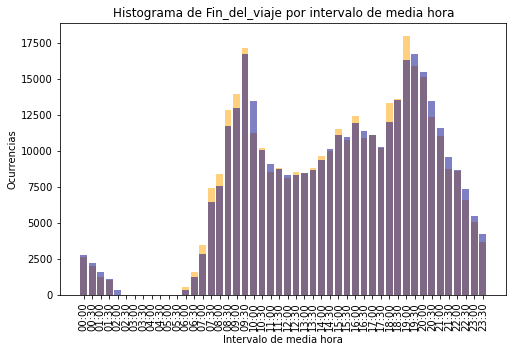

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Convertir las columnas a formato de fecha y hora
dataframe["Inicio_del_viaje"] = pd.to_datetime(dataframe["Inicio_del_viaje"])
dataframe["Fin_del_viaje"] = pd.to_datetime(dataframe["Fin_del_viaje"])

# Paso 2: Extraer la hora y el minuto
dataframe["Inicio_del_viaje_hora"] = dataframe["Inicio_del_viaje"].dt.hour
dataframe["Inicio_del_viaje_minuto"] = dataframe["Inicio_del_viaje"].dt.minute

dataframe["Fin_del_viaje_hora"] = dataframe["Fin_del_viaje"].dt.hour
dataframe["Fin_del_viaje_minuto"] = dataframe["Fin_del_viaje"].dt.minute

# Paso 3: Crear los histogramas
intervalos = [f"{str(i).zfill(2)}:{str(j).zfill(2)}" for i in range(24) for j in [0, 30]]  # Lista de intervalos de media hora
inicio_ocurrencias = []
fin_ocurrencias = []

for intervalo in intervalos:
    hora, minuto = intervalo.split(":")
    hora = int(hora)
    minuto = int(minuto)

    # Filtrar los registros que caen dentro del intervalo de media hora
    filtro_inicio = (dataframe["Inicio_del_viaje_hora"] == hora) & (dataframe["Inicio_del_viaje_minuto"] >= minuto) & (dataframe["Inicio_del_viaje_minuto"] < minuto + 30)
    filtro_fin = (dataframe["Fin_del_viaje_hora"] == hora) & (dataframe["Fin_del_viaje_minuto"] >= minuto) & (dataframe["Fin_del_viaje_minuto"] < minuto + 30)

    # Contar las ocurrencias
    inicio_ocurrencias.append(len(dataframe[filtro_inicio]))
    fin_ocurrencias.append(len(dataframe[filtro_fin]))

# Gráfica para Inicio_del_viaje
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.bar(intervalos, inicio_ocurrencias, alpha=0.5, color='orange', label="Inicio_del_viaje")
plt.xlabel("Intervalo de media hora")
plt.ylabel("Ocurrencias")
plt.title("Histograma de Inicio_del_viaje por intervalo de media hora")
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.bar(intervalos, fin_ocurrencias, alpha=0.5, color='darkblue', label="Fin_del_viaje")
plt.xlabel("Intervalo de media hora")
plt.ylabel("Ocurrencias")
plt.title("Histograma de Fin_del_viaje por intervalo de media hora")
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

In [15]:

import pandas as pd
from geopy.distance import geodesic

# Paso 1: Leer el archivo "indiceslocales.txt"
paradas = {}
with open("indiceslocales.txt", "r") as file:
    for line in file:
        index, lat, lon = line.strip().split()
        paradas[int(index)] = (float(lat), float(lon))

# Paso 2: Definir la función para calcular la distancia geodésica
def calcular_distancia_geodesica(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Paso 3: Calcular y agregar la distancia geodésica al dataframe
dataframe["Dist_G"] = dataframe.apply(lambda row: calcular_distancia_geodesica(paradas[row["Origen_Id"]], paradas[row["Destino_Id"]]), axis=1)

dataframe.head()




,Viaje_Id,Usuario_Id,Genero,Ano_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Duracion_del_viaje,Edad,Zona,Inicio_del_viaje_hora,Inicio_del_viaje_minuto,Fin_del_viaje_hora,Fin_del_viaje_minuto,Dist_G
0,28467098,70123,0.0,1967.0,2023-05-01 00:00:03,2023-05-01 00:22:19,64,141,22.266667,56.0,0.0,0,0,0,22,4.340899
1,28467099,2237235,0.0,1980.0,2023-05-01 00:00:23,2023-05-01 00:04:26,36,172,4.050000,43.0,0.0,0,0,0,4,0.773510
2,28467100,2051727,1.0,2002.0,2023-05-01 00:01:05,2023-05-01 00:10:21,96,296,9.266667,21.0,1.0,0,1,0,10,1.171307
3,28467101,2246225,0.0,1969.0,2023-05-01 00:01:07,2023-05-01 00:04:14,33,255,3.116667,54.0,0.0,0,1,0,4,0.389296
4,28467102,324247,0.0,1975.0,2023-05-01 00:01:26,2023-05-01 00:13:18,226,231,11.866667,48.0,2.0,0,1,0,13,1.624038


In [17]:
sub_dataframe = dataframe.loc[:, [ "Genero","Duracion_del_viaje","Edad","Zona","Dist_G"]].dropna()
sub_dataframe.head()


,Genero,Origen_Id,Destino_Id,Duracion_del_viaje,Edad,Zona,Dist_G
0,0.0,64,141,22.266667,56.0,0.0,4.340899
1,0.0,36,172,4.050000,43.0,0.0,0.773510
2,1.0,96,296,9.266667,21.0,1.0,1.171307
3,0.0,33,255,3.116667,54.0,0.0,0.389296
4,0.0,226,231,11.866667,48.0,2.0,1.624038


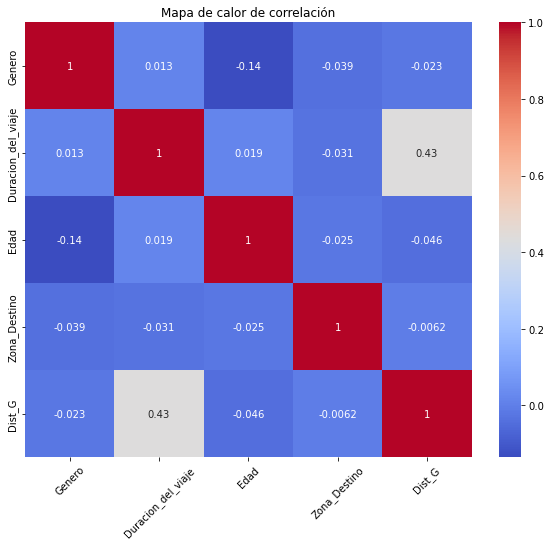

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el mapa de calor
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
sns.heatmap(sub_dataframe.corr(), annot=True, cmap='coolwarm')

# Personalizar el gráfico
plt.title('Mapa de calor de correlación')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Dividir los datos en características (X) y variable objetivo (y)
columnas_deseadas = [ 'Genero', 'Edad']
X = sub_dataframe[columnas_deseadas]
y = sub_dataframe["Zona"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.8940984566481242


In [55]:
X.head()

,Genero,Edad
0,0.0,56.0
1,0.0,43.0
2,1.0,21.0
3,0.0,54.0
4,0.0,48.0


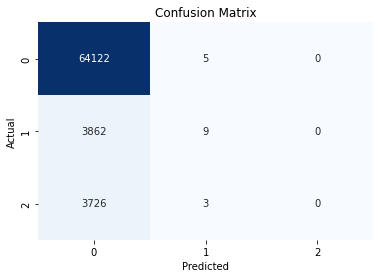

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Personalizar el gráfico
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Mostrar el gráfico
plt.show()

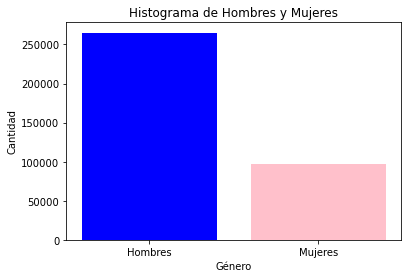

In [22]:
conteo = dataframe['Genero'].value_counts()
hombres = conteo[0.0]
mujeres = conteo[1.0]

# Crear el histograma
generos = ['Hombres', 'Mujeres']
cantidad = [hombres, mujeres]

plt.bar(generos, cantidad, color=['blue', 'pink'])
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Histograma de Hombres y Mujeres')
plt.show()

33.93597377344947 10.673843699662532


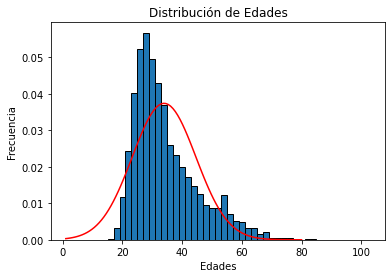

In [5]:

# Generar los límites de los rangos de edad
edades_min = int(dataframe['Edad'].min())  # Edad mínima en el DataFrame
edades_max = int(dataframe['Edad'].max())  # Edad máxima en el DataFrame
rangos_edad = range(edades_min, edades_max + 2, 2)  # Rangos de edad de 10 en 10

data = dataframe["Edad"].dropna()
mu, std = stats.norm.fit(data)
print(mu,std)

x = np.linspace(data.min(), 80, 100)
pdf = stats.norm.pdf(x, mu,std)
# Crear el histograma
plt.hist(dataframe['Edad'], bins=rangos_edad, edgecolor='black',density=True)
plt.plot(x, pdf, 'r-', label='Distribución Normal')
# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de Edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

33.93597377344947


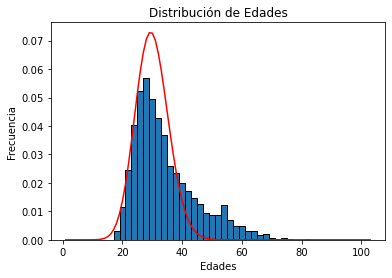

In [11]:
# Generar los límites de los rangos de edad
edades_min = int(dataframe['Edad'].min())  # Edad mínima en el DataFrame
edades_max = int(dataframe['Edad'].max())  # Edad máxima en el DataFrame
rangos_edad = range(edades_min, edades_max + 2, 2)  # Rangos de edad de 10 en 10

data = dataframe["Edad"].dropna()
mu = data.mean()  # Parámetro lambda para la distribución de Poisson
print(mu)
x = np.arange(data.min(), data.max() + 1)
pmf = stats.poisson.pmf(x, mu-4)
# Crear el histograma
plt.hist(dataframe['Edad'], bins=rangos_edad, edgecolor='black', density=True)
plt.plot(x, pmf, 'r-', label='Distribución de Poisson')
# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de Edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

2251
10.631289989510048 10.673489469198145


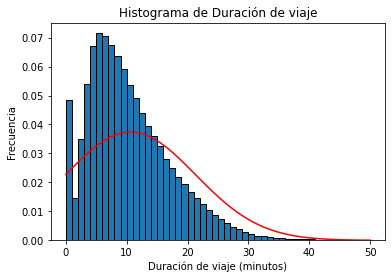

In [40]:
# Generar los límites de los rangos de edad
tiempo_maximo = int(dataframe["Duracion_del_viaje"].max())
print(tiempo_maximo)
# Crear el rango de bins del histograma en intervalos de 2 minutos
bins = range(0, 50, 1)

data = dataframe["Duracion_del_viaje"]
mu, std = stats.norm.fit(data)
print(mu,std)
pmf = stats.poisson.pmf(x, mu)
x = np.linspace(data.min(), 50, 100)
pdf = stats.norm.pdf(x, mu,std)

# Crear el histograma
plt.hist(dataframe["Duracion_del_viaje"], bins=bins,edgecolor='black',density=True)
plt.plot(x, pdf, 'r-', label='Distribución Normal')
# Configurar los ejes y el título
plt.xlabel("Duración de viaje (minutos)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Duración de viaje")

# Mostrar el histograma
plt.show()

In [ ]:
gmap = gmplot.GoogleMapPlotter(20.6597, -103.3496, 13)
latitudes = []
longitudes = []
with open("locales.txt", "r") as archivo:
    for linea in archivo:
        valores = linea.split(	)  # Separar los valores por espacios en blanco
        latitudes.append(float(valores[0]))  # Convertir y guardar el valor de la columna 1
        longitudes.append(float(valores[1])) 

# Obtener los datos de latitud y longitu
#  # Ejemplo de longitudes de los puntos
latitudes_1 = []
longitudes_1 = []
latitudes_2 = []
longitudes_2 = []

latitudes_3 = []
longitudes_3 = []

for i in range(1,116):
      latitudes_1.append(latitudes[i])
      longitudes_1.append(longitudes[i])

for i in range(116,226):
      latitudes_2.append(latitudes[i])
      longitudes_2.append(longitudes[i])

for i in range(226,312):
      latitudes_3.append(latitudes[i])
      longitudes_3.append(longitudes[i])
# Marcar los puntos en el mapa
gmap.scatter(latitudes_1, longitudes_1, color='blue', size=40, marker=True)
gmap.scatter(latitudes_2, longitudes_2, color='orange', size=40, marker=True)
gmap.scatter(latitudes_3, longitudes_3, color='green', size=40, marker=True)
# Guardar el mapa en un archivo HTML
gmap.draw("mapa.html")


In [47]:
data = pd.read_csv('indiceslocales.txt', delimiter='\t', header=None)
data.columns = ['Estacion_Id', 'Latitud', 'Longitud']

def in_interval(x,a,b):
    if  (x>= a and x<=b):
        return True
    else:
        return False


def asignar_location(valor):
    if (valor>= 2 and valor<=88) or (valor>= 125 and valor<=141) or (valor>= 154 and valor<=225) or (valor>= 241 and valor<=250) or (valor>= 253 and valor<=256) or (valor>= 259 and valor<=266) or (valor>= 268 and valor<=269)or(valor>= 271 and valor<=285) or (valor>= 303 and valor<=304) or (valor>= 306 and valor<=316) or (valor>= 319 and valor<=321) or (valor>= 323 and valor<=324) or (valor>= 326 and valor<=327):
        return 0 #POLIGONO CENTRAL
    elif (valor>= 91 and valor<=120) or (valor>= 286 and valor<=296):
        return 1 #ZAPOAN CENTRO
    elif in_interval(valor,142,153) or in_interval(valor,226,240) or (valor==267)or (valor==270) or (valor==302) or (valor==305) or in_interval(valor,317,318) or (valor==322) or (valor==325):
        return 2 #TLQ-CORREDORATLAS

# Aplicar la función a la columna "Destino_Id" y asignar los valores resultantes a la columna "Zona"
data['Location_Destino'] = data['Estacion_Id'].apply(asignar_location)      
data.head()

,Estacion_Id,Latitud,Longitud,Location_Destino
0,2,20.666378,-103.348820,0.0
1,3,20.667228,-103.366000,0.0
2,4,20.667690,-103.368252,0.0
3,5,20.691750,-103.362550,0.0
4,6,20.681151,-103.338863,0.0


In [48]:


gmap = gmplot.GoogleMapPlotter(20.6597, -103.3496, 13)

colors = {0: 'blue', 1: 'green', 2: 'orange'}

for index, row in data.iterrows():
    lat, lon = row['Latitud'], row['Longitud']
    color = colors.get(row['Location_Destino'], 'orange')
    gmap.marker(lat, lon, color=color)

gmap.draw("mapa_estaciones.html")

In [ ]:
gmap = gmplot.GoogleMapPlotter(20.6597, -103.3496, 13)

station = {0,51 ,
271,
11 ,    
35 ,    
52 ,    
50 ,    
54 ,    
260 ,  
194 ,  
58   }

for index, row in data.iterrows():
    lat, lon = row['Latitud'], row['Longitud']
    if row['Estacion_Id'] in station:
        gmap.marker(lat, lon, color="gray")

gmap.draw("mapa_origen_mas_usadas.html")

In [ ]:
gmap = gmplot.GoogleMapPlotter(20.6597, -103.3496, 13)

station = {51 ,
35     ,
271    ,
11     ,
52     ,
50     ,
54     ,
34     ,
260    ,
58      }

for index, row in data.iterrows():
    lat, lon = row['Latitud'], row['Longitud']
    if row['Estacion_Id'] in station:
        gmap.marker(lat, lon, color="black")

gmap.draw("mapa_destino_mas_usadas.html")